In [15]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

In [16]:
image = cv2.imread('/content/9189f2378450d6472deb182a90f8b2a6.jpeg', cv2.IMREAD_COLOR)

array([[[ 31, 142, 158],
        [ 28, 143, 163],
        [ 13, 140, 165],
        ...,
        [ 19, 148, 175],
        [ 13, 154, 167],
        [ 10, 161, 165]],

       [[ 24, 155, 168],
        [ 21, 156, 172],
        [ 12, 154, 177],
        ...,
        [ 17, 153, 181],
        [  9, 158, 172],
        [  7, 163, 168]],

       [[  0, 167, 173],
        [  0, 167, 177],
        [  0, 170, 187],
        ...,
        [ 14, 168, 197],
        [  4, 169, 184],
        [  3, 172, 179]],

       ...,

       [[ 10, 180, 191],
        [  8, 178, 190],
        [  9, 179, 197],
        ...,
        [ 11, 183, 213],
        [  7, 180, 200],
        [  5, 179, 192]],

       [[ 12, 170, 183],
        [  6, 167, 181],
        [  4, 168, 187],
        ...,
        [  7, 168, 206],
        [  8, 169, 191],
        [  6, 170, 183]],

       [[  8, 160, 171],
        [  1, 157, 170],
        [  0, 158, 176],
        ...,
        [  2, 158, 194],
        [  4, 159, 180],
        [  2, 160, 173]]], dtype=uint8)
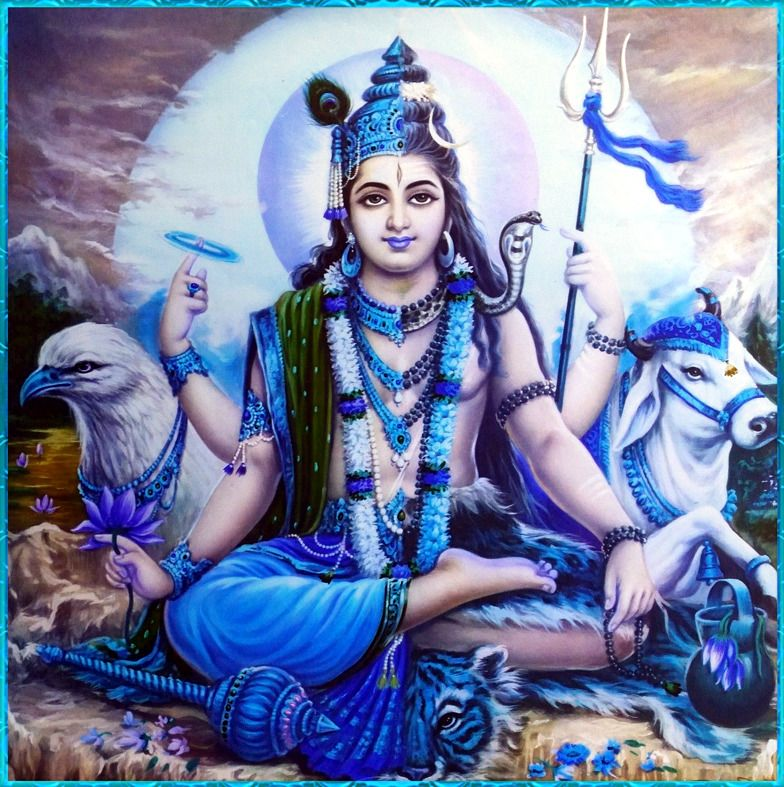

In [3]:
image

In [4]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

array([[[158, 142,  31],
        [163, 143,  28],
        [165, 140,  13],
        ...,
        [175, 148,  19],
        [167, 154,  13],
        [165, 161,  10]],

       [[168, 155,  24],
        [172, 156,  21],
        [177, 154,  12],
        ...,
        [181, 153,  17],
        [172, 158,   9],
        [168, 163,   7]],

       [[173, 167,   0],
        [177, 167,   0],
        [187, 170,   0],
        ...,
        [197, 168,  14],
        [184, 169,   4],
        [179, 172,   3]],

       ...,

       [[191, 180,  10],
        [190, 178,   8],
        [197, 179,   9],
        ...,
        [213, 183,  11],
        [200, 180,   7],
        [192, 179,   5]],

       [[183, 170,  12],
        [181, 167,   6],
        [187, 168,   4],
        ...,
        [206, 168,   7],
        [191, 169,   8],
        [183, 170,   6]],

       [[171, 160,   8],
        [170, 157,   1],
        [176, 158,   0],
        ...,
        [194, 158,   2],
        [180, 159,   4],
        [173, 160,   2]]], dtype=uint8)
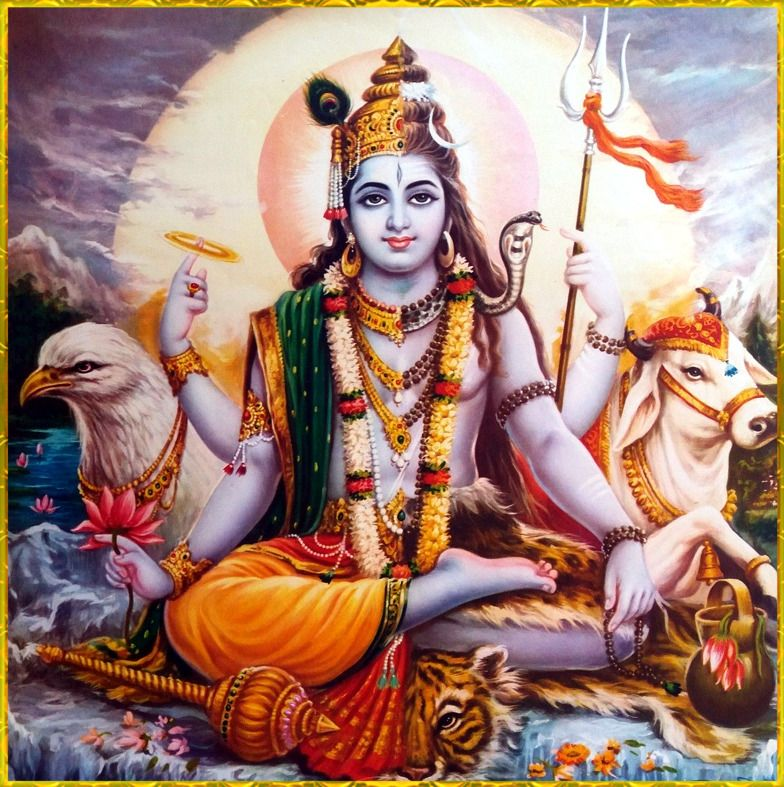

In [5]:
image

In [6]:
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

array([[134, 136, 133, ..., 141, 142, 145],
       [144, 145, 145, ..., 146, 145, 147],
       [150, 151, 156, ..., 159, 155, 155],
       ...,
       [164, 162, 165, ..., 172, 166, 163],
       [156, 153, 155, ..., 161, 157, 155],
       [146, 143, 145, ..., 151, 148, 146]], dtype=uint8)
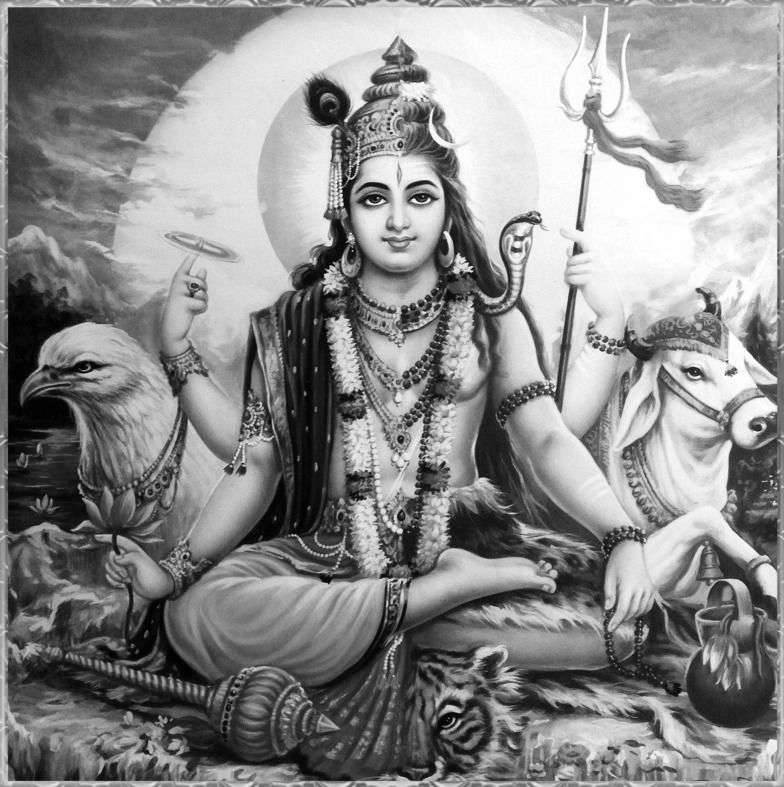

In [7]:
gray

In [10]:
# Function for Thresholding
def thresholding(image, threshold_value):
    _, thresh_image = cv2.threshold(image, threshold_value, 255, cv2.THRESH_BINARY)
    return thresh_image

In [11]:
# Function for Region Growing (Simple version)
def region_growing(image, seed_point, threshold):
    rows, cols = image.shape
    segmented_image = np.zeros_like(image)
    seed_x, seed_y = seed_point
    seed_value = image[seed_x, seed_y]

    # Initialize a queue for the region growing algorithm
    queue = [seed_point]
    segmented_image[seed_x, seed_y] = 255

    while queue:
        x, y = queue.pop(0)

        # With 4 path
        for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
            nx, ny = x + dx, y + dy
            if 0 <= nx < rows and 0 <= ny < cols and segmented_image[nx, ny] == 0:
                if abs(int(image[nx, ny]) - int(seed_value)) < threshold:
                    segmented_image[nx, ny] = 255
                    queue.append((nx, ny))

    return segmented_image

In [20]:
# Apply Thresholding
threshold_value = 128  # You can adjust this value
thresh_image = thresholding(gray, threshold_value)

In [21]:
# Apply Region Growing
seed_point = (gray.shape[0] // 2, gray.shape[1] // 2)  # Starting in the middle
threshold = 20  # You can adjust this value
region_growing_image = region_growing(gray, seed_point, threshold)

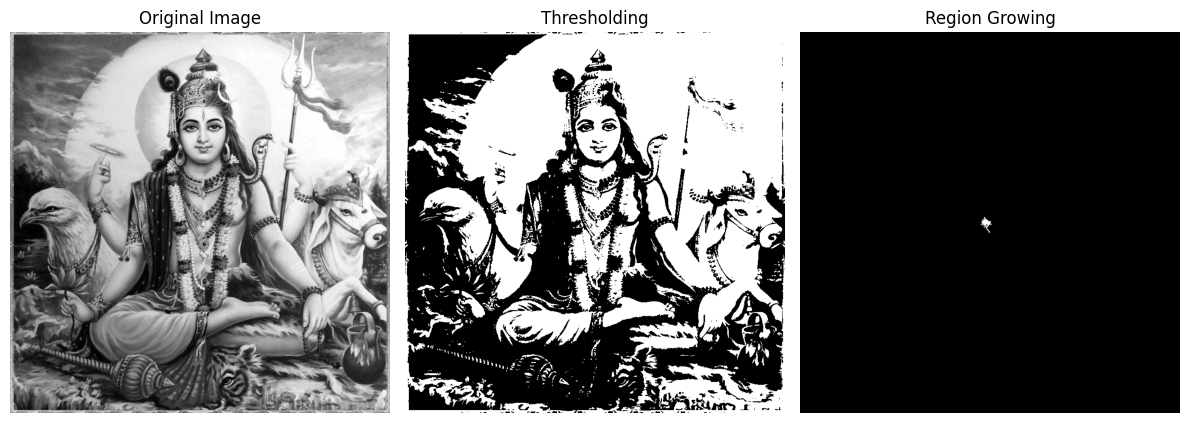

In [22]:
# Plot results
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(gray, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Thresholding')
plt.imshow(thresh_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Region Growing')
plt.imshow(region_growing_image, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()